In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load=pd.read_csv(city_data_to_load)
ride_data_to_load=pd.read_csv(ride_data_to_load)


In [2]:
# Combine the data into a single dataset
merge_ride=pd.merge(ride_data_to_load,city_data_to_load,on ="city", how="left")
# Display the data table for preview
merge_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

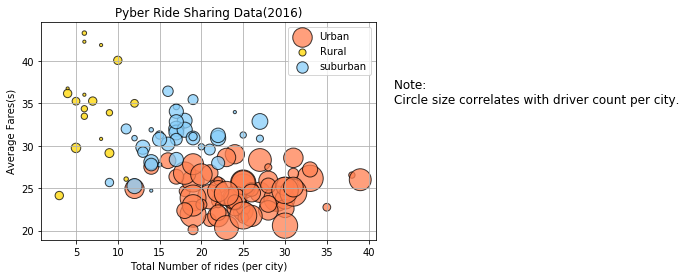

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_type = merge_ride["type"] == "Urban"
type_urban=merge_ride[urban_type].groupby(merge_ride["city"])

x_urban=type_urban["ride_id"].count()
y_urban=type_urban["fare"].mean()
s_urban=type_urban["driver_count"].mean()

rural_type = merge_ride["type"] == "Rural"
type_rural=merge_ride[rural_type].groupby(merge_ride["city"])

x_rural=type_rural["ride_id"].count()
y_rural=type_rural["fare"].mean()
s_rural=type_rural["driver_count"].mean()

Suburban_type = merge_ride["type"] == "Suburban"
type_Suburban=merge_ride[Suburban_type].groupby(merge_ride["city"])

x_suburban=type_Suburban["ride_id"].count()
y_suburban=type_Suburban["fare"].mean()
s_suburban=type_Suburban["driver_count"].mean()

# Build the scatter plots for each city types
urban_graph=plt.scatter(x_urban, y_urban, marker="o", facecolors="coral", edgecolors="black",label='Urban',
            s=s_urban*10, alpha=0.75)
rural_graph=plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black",label='Rural',
            s=s_rural*10, alpha=0.75)

suburban_graph=plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",label='suburban',
            s=s_suburban*10, alpha=0.75)


# Prints the scatter plot to the screen

# Incorporate the other graph properties
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)
# Create a legend
plt.legend()
# Incorporate a text label regarding circle size
# Give our chart some labels and a tile
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of rides (per city)")
plt.ylabel("Average Fares(s)")
# Save Figure

plt.grid()
plt.savefig("PyberRideScatter.png")




In [4]:
# Show plot
plt.show()

## Total Fares by City Type

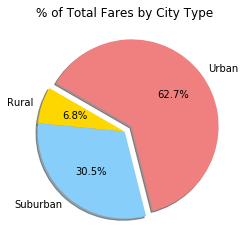

In [5]:
# Calculate Type Percents

city_type_Avg=merge_ride.groupby(["type"])
fare_city=city_type_Avg["fare"].sum()
fare_city

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(fare_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")



# Save Figure
plt.savefig("PyberRidePie.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

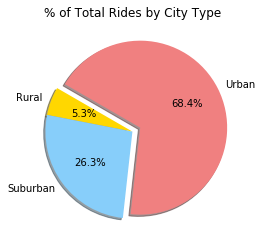

In [7]:
# Calculate Ride Percents

city_ride_Avg=merge_ride.groupby(["type"])
ride_city=city_ride_Avg["ride_id"].count()
ride_city

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(ride_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")



# Save Figure
plt.savefig("PyberRidePie_Total ride.png")



In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

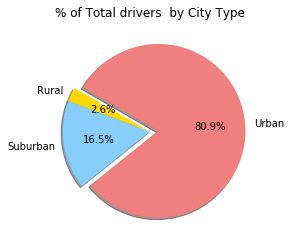

In [9]:
# Calculate Driver Percents
city_driver_Avg=city_data_to_load.groupby(["type"]).sum()
city_driver_Avg


labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]



# Build Pie Chart
plt.pie(city_driver_Avg, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total drivers  by City Type")



# Save Figure
plt.savefig("PyberRidePie_Total ride.png")



In [ ]:
# Show Figure
plt.show()